
<center>
  <h1 style='background:#33ffff; border:4; border-radius: 10px; color:black; font-size: 36px'>Supermarket store branches sales analysis</h1>
  <p style='background:#33ffff; border:4; border-radius: 10px; color:black; font-size: 15px; text-align: center;'>www.kaggle.com</p>
</center>




## Content:
In the dataset, You'll get data of different stores of a supermarket company as per their store IDs which for ease has been converted to positive integers.

#### Store ID: (Index) ID of the particular store.

#### Store_Area: Physical Area of the store in yard square.

#### Items_Available: Number of different items available in the corresponding store.

#### Daily_Customer_Count: Number of customers who visited to stores on an average over month.

#### Store_Sales: Sales in (US $) that stores made.


<h1 style='background:#66ffff; border:3; border-radius: 10px; color:black'><center>Open file and import libraries</center></h1>


In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
stores = pd.read_csv("Stores.csv", index_col='Store ID ')

<h1 style='background:#66ffff; border:3; border-radius: 10px; color:black'><center>Basic information about the dataset / Examine the data</center></h1>



In [233]:
stores.shape

(896, 4)

In [234]:
stores.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620


In [235]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 1 to 896
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 35.0 KB


In [178]:
stores.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

In [179]:
stores.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Area,896.0,1485.409598,250.237011,775.0,1316.75,1477.0,1653.50,2229.0
Items_Available,896.0,1782.035714,299.872053,932.0,1575.50,1773.5,1982.75,2667.0
Daily_Customer_Count,896.0,786.350446,265.389281,10.0,600.00,780.0,970.00,1560.0
Store_Sales,896.0,59351.305804,17190.741895,14920.0,46530.00,58605.0,71872.50,116320.0


In [180]:
stores.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [181]:
stores.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

<h1 style='background:#66ffff; border:3; border-radius: 10px; color:black'><center>Distribution and Data Visualization</center></h1>



array([[<AxesSubplot:title={'center':'Store_Area'}>,
        <AxesSubplot:title={'center':'Items_Available'}>],
       [<AxesSubplot:title={'center':'Daily_Customer_Count'}>,
        <AxesSubplot:title={'center':'Store_Sales'}>]], dtype=object)

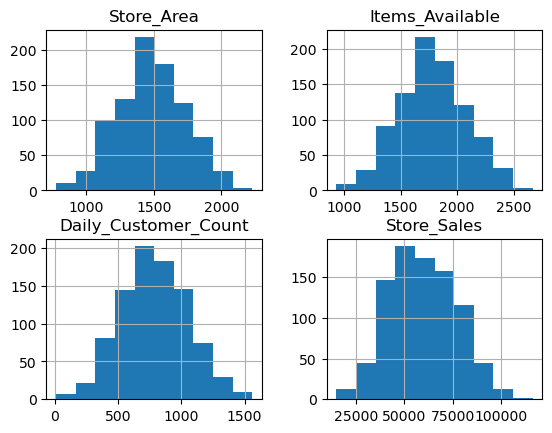

In [182]:
stores.hist()

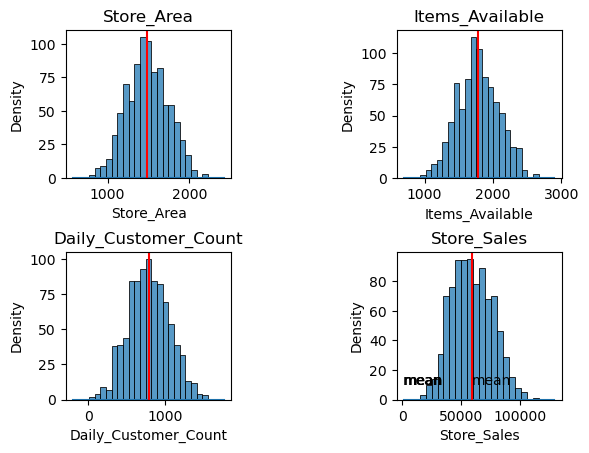

In [23]:
# 2 rows and 2 columns subplots:
fig, ax = plt.subplots(2, 2)

for i, col in enumerate(stores.columns):
    sns.kdeplot(data=stores, x=col, ax=ax[i // 2][i % 2])
    sns.histplot(data=stores, x=col, ax=ax[i // 2][i % 2])
    mean = stores[col].mean()
    ax[i // 2][i % 2].axvline(mean, color='r', label="mean") # show mean on plot as red verical line
#     ax[i // 2][i % 2].text(mean, ax[i // 2][i % 2].get_ylim()[1], "  Mean", color='black', va='top', ha='left')
    ax[i // 2][i % 2].set_title(col)
    
    
# set width and high between subplots (1 cal x axis,i 0,5 y axis)
plt.subplots_adjust(wspace=1, hspace=0.5)


In [184]:
stores['Sales_Rank']= stores['Store_Sales'].rank(ascending=False) #create Sales_Rank column
stores.sort_values(by='Sales_Rank', inplace=True)

In [185]:
stores.nlargest(n=5, columns='Daily_Customer_Count')

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_Rank
Store ID,,,,,
849,919,1099,1560,73810,197.0
350,1886,2228,1530,40350,767.0
536,1057,1262,1490,35420,834.0
95,1921,2305,1470,77120,150.5
313,1494,1806,1450,43640,718.0


In [186]:
stores.nsmallest(n=5, columns='Items_Available')

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_Rank
Store ID,,,,,
159,775,932,1090,42530,738.0
866,780,951,790,25600,883.0
745,854,1018,660,77740,144.0
550,869,1050,850,52540,553.0
407,896,1059,870,75110,182.0


In [199]:
stores=stores.drop('Sales_Rank', axis=1)

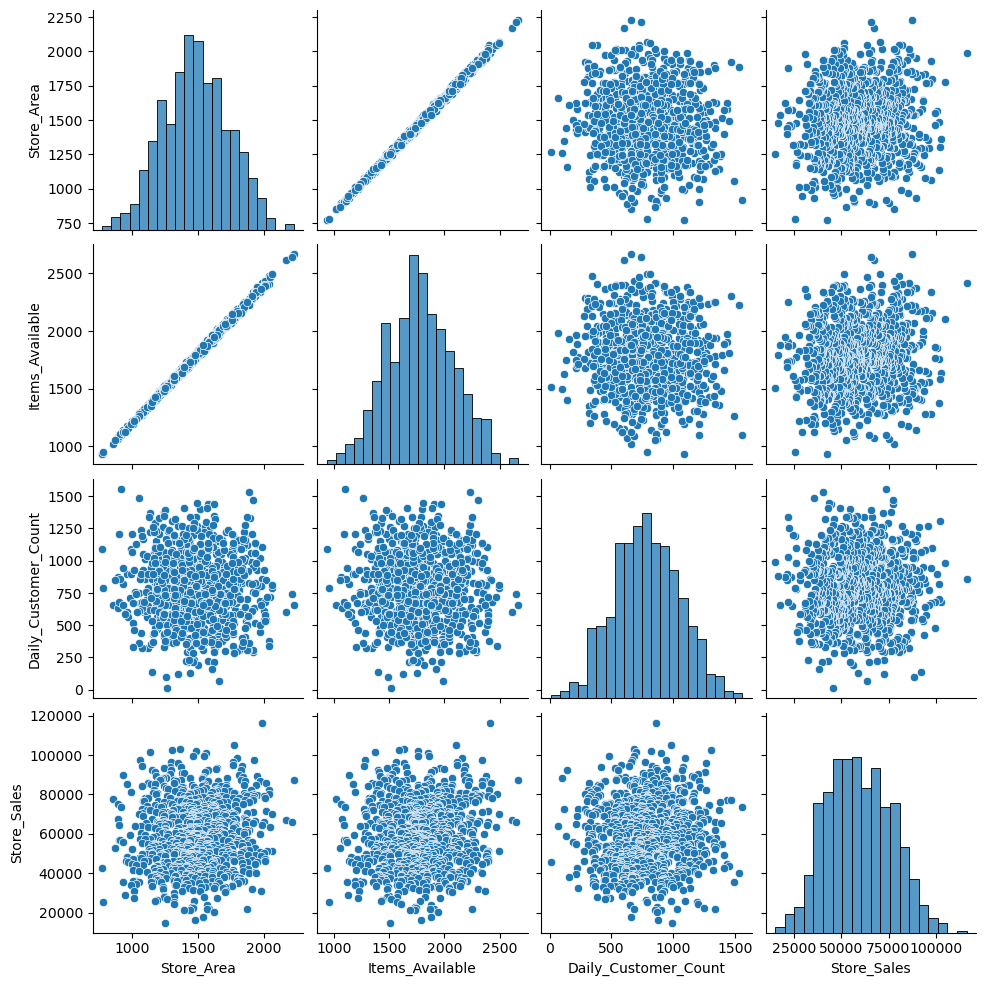

In [187]:
sns.pairplot(data=stores.iloc[:,0:4]) #":" select all row, secound ":" columns from 0 (included) to 5 (excluded).

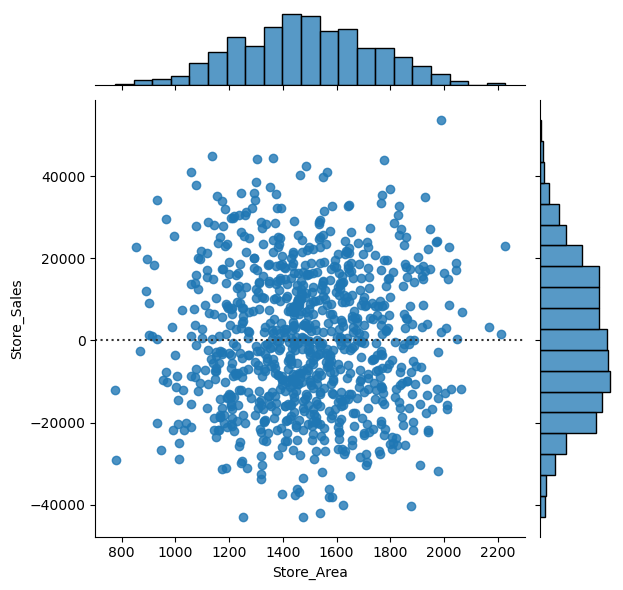

In [188]:
sns.jointplot(x=stores['Store_Area'], y=stores['Store_Sales'], kind='resid')

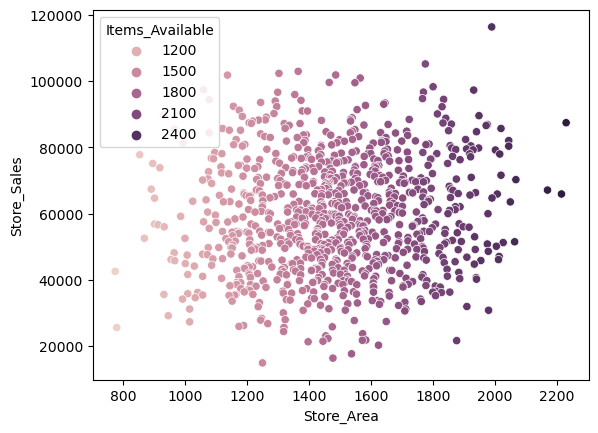

In [189]:
sns.scatterplot(x=stores.Store_Area, y = stores.Store_Sales, hue=stores.Items_Available, legend='auto' )
# sns.regplot(x=stores.Store_Area, y = stores.Store_Sales) #scaterplot with regresion line
# sns.lmplot(x = 'Store_Area', y= 'Store_Sales',hue='Items_Available',data = stores) #sns.lmplot command to add two regression lines based on hue
plt.show()

### Correlation

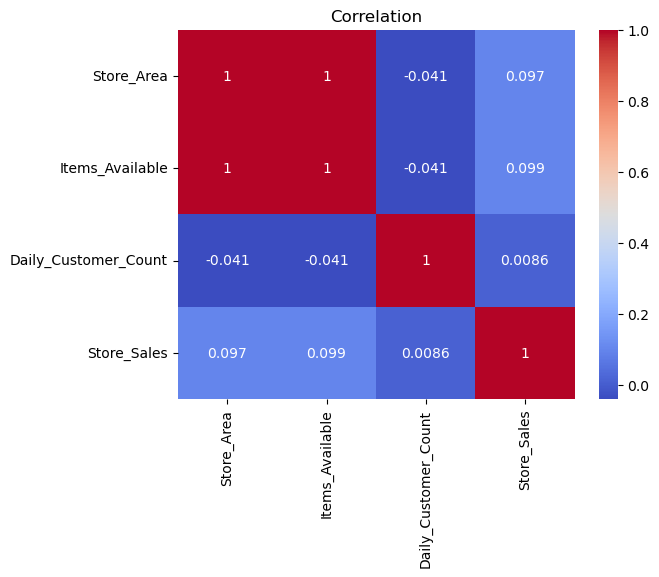

In [191]:
sns.heatmap(stores.iloc[:,:4].corr(),annot=True,cmap="coolwarm" )
plt.title('Correlation')
plt.show()

In [206]:
stores= stores.drop('Store_Area',axis=1) # delete Store_Area. Store_Area and Items_Available are completely correlated so I deleted Store_Area

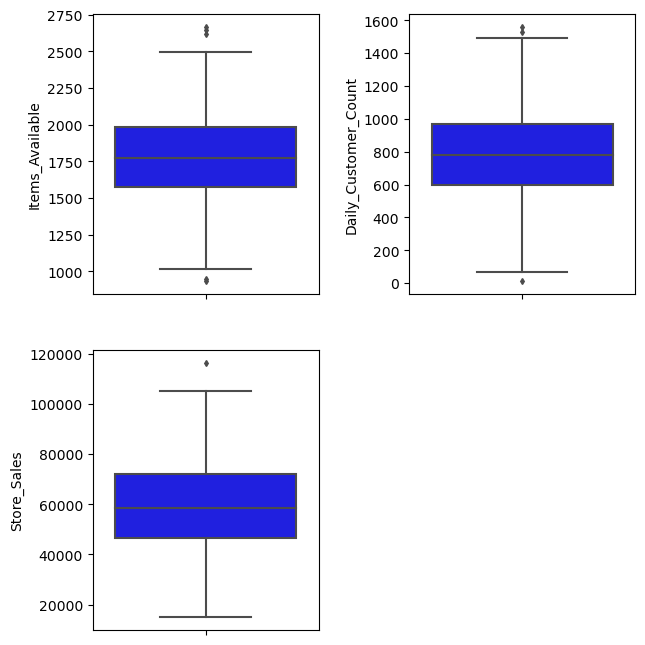

In [207]:
i=1
plt.figure(figsize=(7,8))
for feature in stores.columns:
    plt.subplot(2,2,i) #wiersze,kolumny,numer wykresu(nadaje pozycje,czwarty argument to projection do generowania typu wykresu
    sns.boxplot(y=stores[feature],color='blue', fliersize=3)
    i+=1
plt.subplots_adjust(wspace=0.4, hspace=0.2)

### Outliers:

In [209]:
from sklearn.neighbors import LocalOutlierFactor
features=stores[['Items_Available','Daily_Customer_Count','Store_Sales']]
clf = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
clf.fit(features)

# Oblicz LOF dla każdego punktu w dataframe i przewiduj wartości anomalii
stores['LOF'] = clf.negative_outlier_factor_
stores['Outlier'] = clf.fit_predict(features)

# Znajdź i usuń outlierów z dataframe dla każdej z kolumn
stores = stores[stores['Outlier'] != -1]
stores.head()



,Items_Available,Daily_Customer_Count,Store_Sales,LOF,Outlier
Store ID,,,,,
1,1961,530,66490,-1.076033,1
3,1609,720,54010,-0.982580,1
4,1748,620,53730,-0.967917,1
5,2111,450,46620,-0.948340,1
6,1733,760,45260,-0.978376,1


In [212]:
stores.drop(['LOF','Outlier'],axis=1)

,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,
1,1961,530,66490
3,1609,720,54010
4,1748,620,53730
5,2111,450,46620
6,1733,760,45260
...,...,...,...
892,1910,1080,66390
893,1663,850,82080
894,1436,1060,76440


<AxesSubplot:xlabel='Store_Area', ylabel='Store_Sales'>

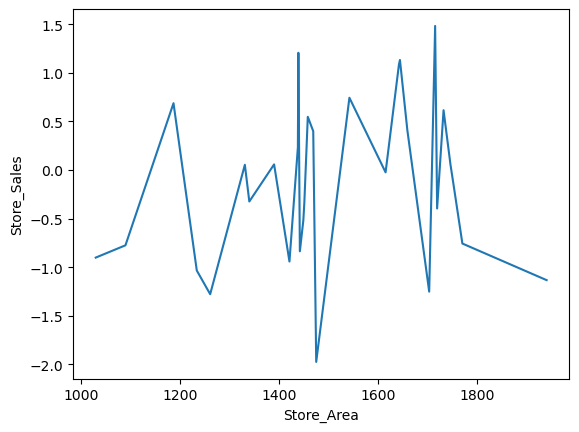

In [109]:
# sns.lineplot(data=(stores.Items_Available.head(30)))
# sns.lineplot(data=(stores.Store_Area.head(30)))  #the same in one line code:

# sns.lineplot(data=stores.head(30), x='Store_Area', y='Store_Sales')

<AxesSubplot:title={'center':'First 10 stores'}, xlabel='Store ID '>

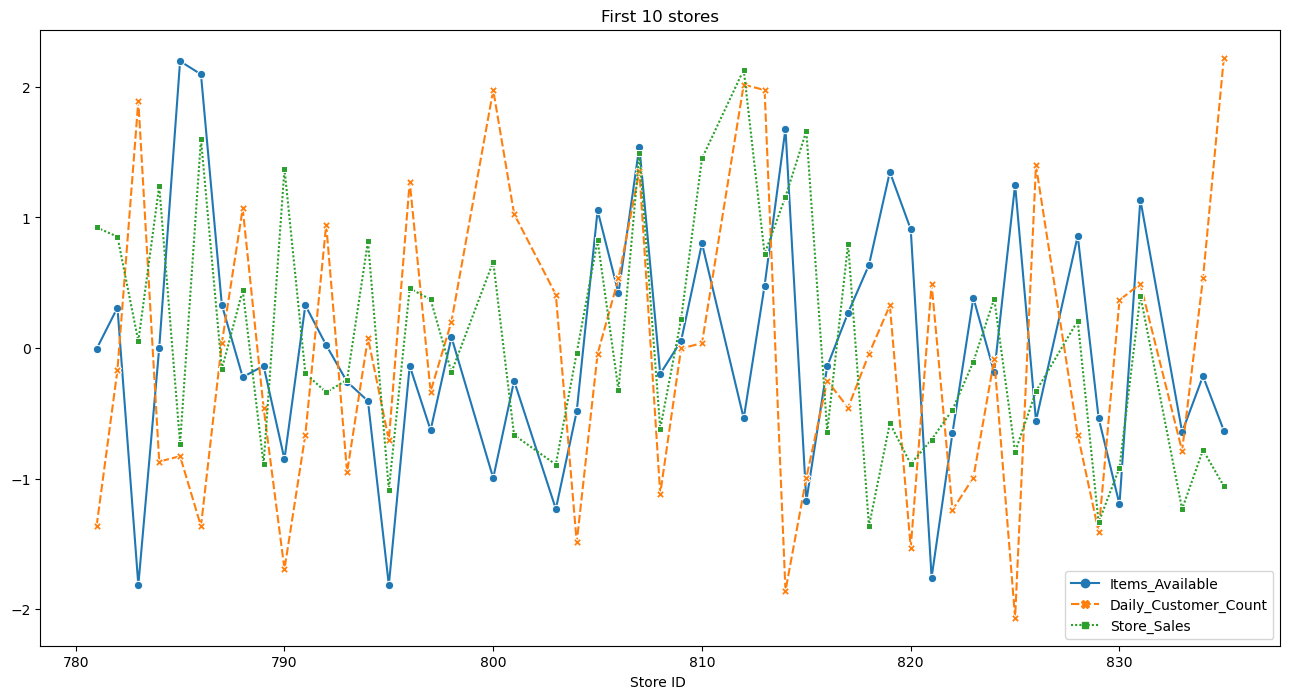

In [106]:
# from sklearn.preprocessing import StandardScaler

# # Set the width and height of the figure
# plt.figure(figsize=(16,8))
# # Add title
# plt.title("First 10 stores")

# #Standarization
# ss = StandardScaler()
# stores[features] = ss.fit_transform(stores[features])
# (stores[features]).head()
# sns.lineplot(data=stores[features].iloc[700:750,:4],markers=True, )


<h1 style='background:#66ffff; border:3; border-radius: 10px; color:black'><center>Machine learning</center></h1>


In [213]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [214]:
y = stores.Store_Sales
stores_features = ['Items_Available','Daily_Customer_Count']
X = stores[stores_features]

In [215]:
from sklearn.model_selection import train_test_split
# split data into training and test set

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0, test_size=0.2)

In [216]:
models= [LinearRegression(), DecisionTreeRegressor(),
         RandomForestRegressor(), xgb.XGBRegressor(), ElasticNet()]
for model in models:
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    print(f"{model}:")
    print(f"MAE:{round(mean_absolute_error(test_y,y_pred),3)}")
    print(f"RMSE:{round(mean_squared_error(test_y,y_pred),3)}")
    print(f"R2_Score:{round(r2_score(test_y, y_pred),3)}")
    print(25*"-")

LinearRegression():
MAE:14594.227
RMSE:306030656.522
R2_Score:0.012
-------------------------
DecisionTreeRegressor():
MAE:18756.79
RMSE:526576754.321
R2_Score:-0.701
-------------------------
RandomForestRegressor():
MAE:15798.769
RMSE:377655926.251
R2_Score:-0.22
-------------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None):
MAE:16461.03
RMSE:415972590.023
R2_Score:-0.343
-------------------------
Elas

C:\Users\avoCADo_1\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Linear regression r2_score=0.012 --> 1.2% of the variation in the target variable can be explained by the features.
Negative r2 score means that my predictions are less accurate then the average value of the data set. 
In this case, machine learning isn't useful.

In [159]:
for i in range(10):
    print(f"{i} actual:{test_y.iloc[i]}, predicted: {y_pred[i] }")

0 actual:51190, predicted: 59961.8051113524
1 actual:71300, predicted: 59782.66862761049
2 actual:65660, predicted: 60306.99126552092
3 actual:14920, predicted: 58735.20514627272
4 actual:64010, predicted: 61607.06062685123
5 actual:85000, predicted: 62280.535824681145
6 actual:72020, predicted: 59825.764027361365
7 actual:70940, predicted: 60862.25245676946
8 actual:59290, predicted: 59235.46591893816
9 actual:94460, predicted: 61549.594613269364


In [ ]:
from IPython.display import HTML

css = """
<style>
div#notebook-container {
  padding: 10px;
  background-color: #e6ffff;
}

div.cell.code_cell {
  background-color: #ffffff;
  border: 3px solid #99ffff;
}

div.cell.output {
  background-color: #ccffcc;
}

div.cell.markdown_cell{
  background-color: #e6ffff;
}
</style>
"""

HTML(css)